In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("bank_churn.csv")

#print(df.duplicated().sum())
#print(df.isna().sum())


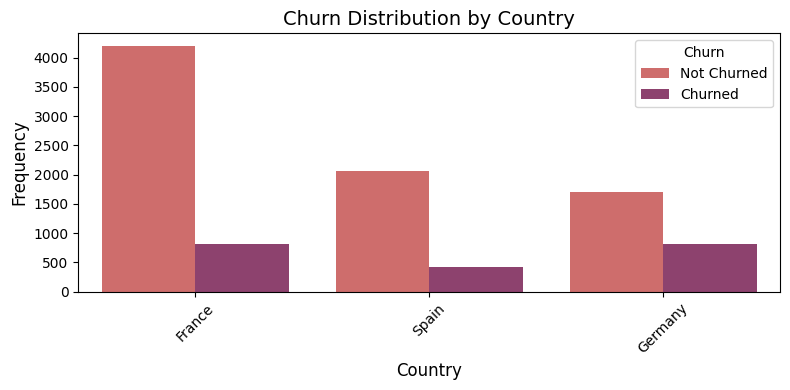

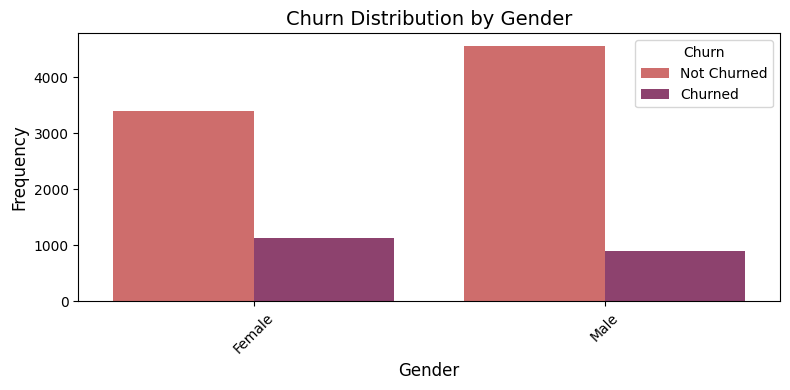

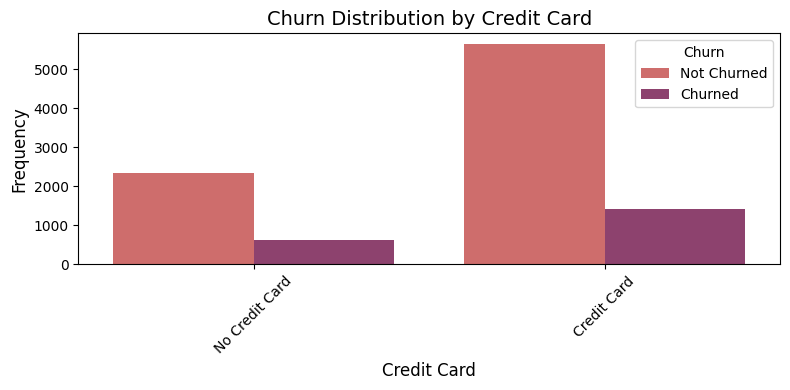

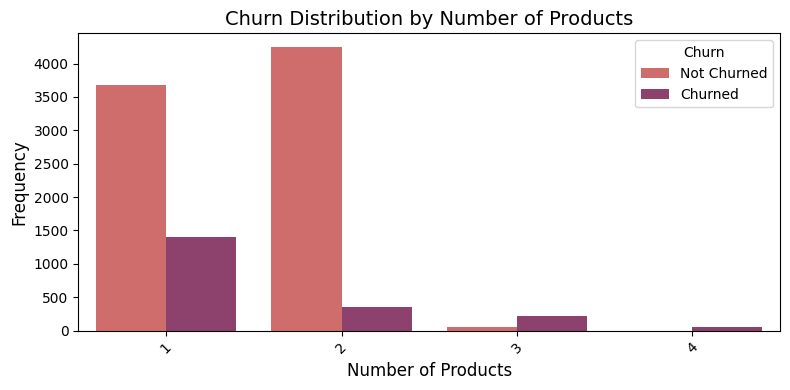

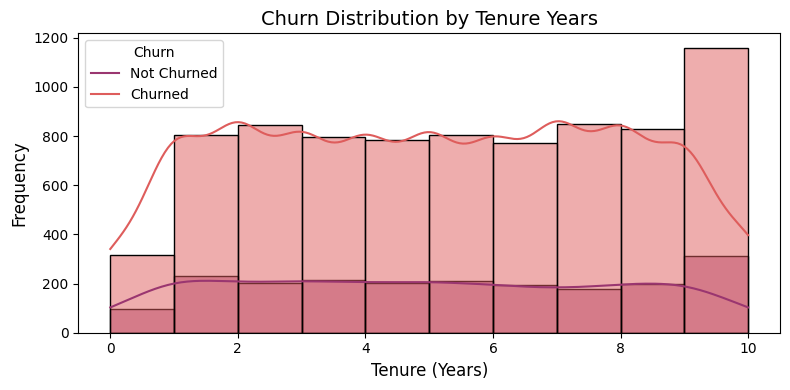

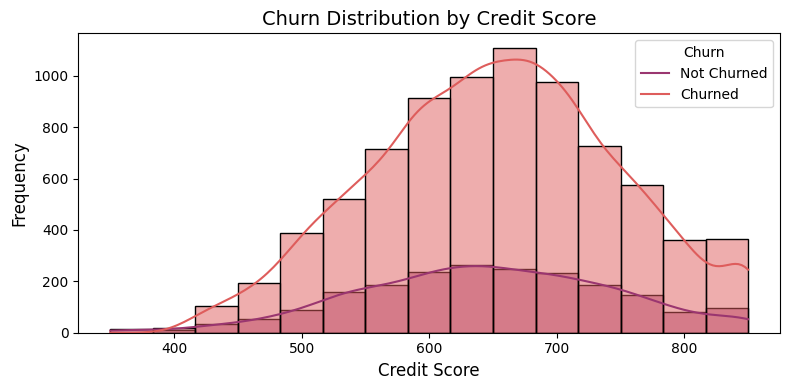

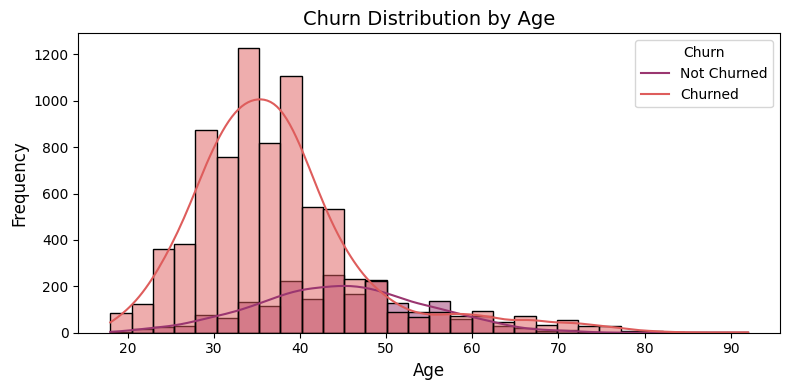

In [3]:
def plot_distribution(feature, title, xlabel, labels=None, hue=None, bins=None):
    plt.figure(figsize=(8, 4))
    
    if df[feature].dtype == 'object' or len(df[feature].unique()) <= 10:  # Categorical features
        ax = sns.countplot(x=feature, data=df, palette='flare', hue=hue)
        plt.xticks(rotation=45)  # Rotate labels for better readability if needed
    else:  # Numeric features
        if bins:
            ax = sns.histplot(data=df, x=feature, bins=bins, kde=True, hue=hue, palette='flare', alpha=0.5)
        else:
            ax = sns.histplot(data=df, x=feature, kde=True, hue=hue, palette='flare', alpha=0.5)
        
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    
    if labels is not None and len(labels) > 0:  # If custom labels (like for churn), update xticks
        plt.xticks(ticks=range(len(labels)), labels=labels)
    
    if hue:  # Only show legend if hue is passed
        plt.legend(title='Churn', labels=["Not Churned", "Churned"])
    
    plt.tight_layout()
    plt.show()

# Now calling the function for various features:
plot_distribution("country", "Churn Distribution by Country", "Country", labels=df['country'].unique(), hue='churn')
plot_distribution("gender", "Churn Distribution by Gender", "Gender", labels=["Female", "Male"], hue="churn")
plot_distribution("credit_card", "Churn Distribution by Credit Card", "Credit Card", labels=["No Credit Card", "Credit Card"], hue='churn')
plot_distribution("products_number", "Churn Distribution by Number of Products", "Number of Products", hue='churn', bins=20)
plot_distribution("tenure", "Churn Distribution by Tenure Years", "Tenure (Years)", hue='churn', bins=10)
plot_distribution("credit_score", "Churn Distribution by Credit Score", "Credit Score", hue='churn', bins=15)
plot_distribution("age", "Churn Distribution by Age", "Age", hue='churn', bins=30)




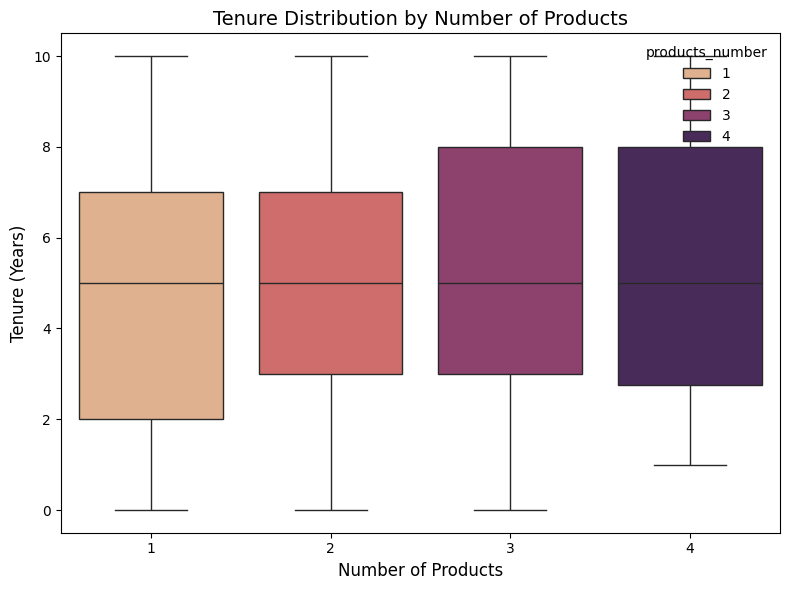

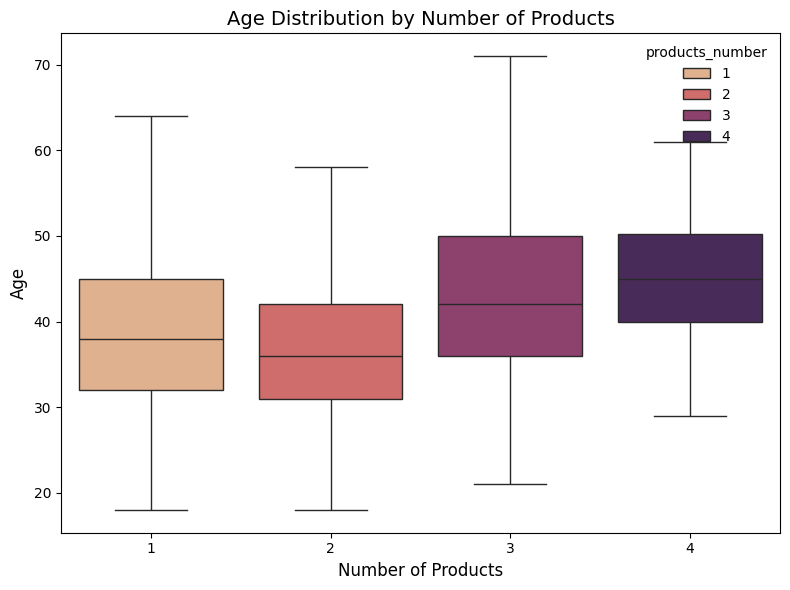

In [4]:
def plot_boxplot(x_feature, y_feature, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_feature, y=y_feature, data=df, hue=x_feature, palette='flare', showfliers=False)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title=x_feature, loc="upper right", frameon=False)  # Adjust legend if needed
    plt.tight_layout()
    plt.show()

# Box plot for Tenure vs Number of Products
plot_boxplot("products_number", "tenure", "Tenure Distribution by Number of Products", "Number of Products", "Tenure (Years)")
plot_boxplot("products_number", "age", "Age Distribution by Number of Products", "Number of Products", "Age")



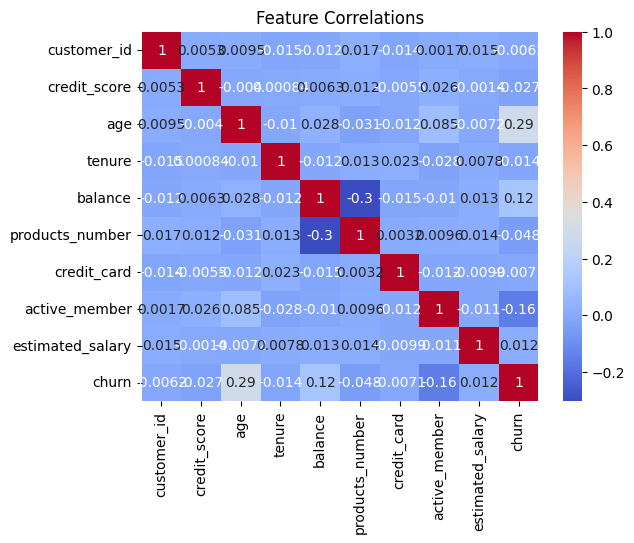

In [5]:
#Feature Correlations
df_numeric = df.select_dtypes(include=["number"])
corr_matrix = df_numeric.corr()
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#avoids assuming any ordinal relationship
df = pd.get_dummies(df, columns=['gender', 'country'], drop_first=True)

#converts all numbers to a standard range (-1 to 1 or 0 to 1)
scaler = StandardScaler()
x = df.drop(columns=['churn'])
y = df['churn']
x_scaled = scaler.fit_transform(x)



In [8]:
#Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Cross-Validation provides mor insight into model performance
logistic_cv_score = cross_val_score(logistic_model, x_scaled, y, cv=5, scoring='accuracy').mean()
rf_cv_score = cross_val_score(random_forest_model, x_scaled, y, cv=5, scoring='accuracy').mean()
dt_cv_score = cross_val_score(decision_tree_model, x_scaled, y, cv=5, scoring='accuracy').mean()

print(f"Logistic Regression (Cross-Validation) Accuracy: {logistic_cv_score:.4f}")
print(f"Random Forest (Cross-Validation) Accuracy: {rf_cv_score:.4f}")
print(f"Decision Tree (Cross-Validation) Accuracy: {dt_cv_score:.4f}")

Logistic Regression (Cross-Validation) Accuracy: 0.8098
Random Forest (Cross-Validation) Accuracy: 0.8618
Decision Tree (Cross-Validation) Accuracy: 0.7886


In [9]:
#Fit Models
logistic_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)

# Evaluate Models with accuracy, confusion matrix, and classification report
def evaluate_model(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model(logistic_model, x_test, y_test, "Logistic Regression")
evaluate_model(random_forest_model, x_test, y_test, "Random Forest")
evaluate_model(decision_tree_model, x_test, y_test, "Decision Tree")

Logistic Regression Accuracy: 0.8105
Logistic Regression Confusion Matrix:
[[1543   64]
 [ 315   78]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest Accuracy: 0.8640
Random Forest Confusion Matrix:
[[1547   60]
 [ 212  181]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Decision Tree Accuracy: 0.7870
Decision Tree Confusion Matrix:
[[1362  245